# Residential Home Sales
### K-Means Clustering, Random Forest Regression, and Ada Boost Regression Models

All residential home sales in Ames, Iowa between 2006 and 2010. The data set contains many explanatory variables on the quality and quantity of physical attributes of residential homes in Iowa sold between 2006 and 2010. Most of the variables describe information a typical home buyer would like to know about a property (square footage, number of bedrooms and bathrooms, size of lot, etc.).

Data Souce: https://www.openintro.org/book/statdata/index.php?data=ames

## Import libraries

In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot") 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Import csv data into dataframe 

In [532]:
df = pd.read_csv("ames.csv")

In [533]:
df.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [534]:
df.shape

(2930, 82)

In [535]:
df.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

## Create new dataframe with only numeric columns

In [536]:
# Select only columns with numeric datatypes (int and float) and convert all to float
df_num = df.select_dtypes(include = np.number).astype("float")

In [537]:
df_num.dtypes.value_counts()

float64    39
dtype: int64

In [538]:
df_num.columns

Index(['Order', 'PID', 'MS.SubClass', 'Lot.Frontage', 'Lot.Area',
       'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add',
       'Mas.Vnr.Area', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF',
       'Total.Bsmt.SF', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath',
       'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'TotRms.AbvGrd',
       'Fireplaces', 'Garage.Yr.Blt', 'Garage.Cars', 'Garage.Area',
       'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch',
       'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Mo.Sold', 'Yr.Sold',
       'SalePrice'],
      dtype='object')

## EDA and Data Wrangling (of numeric data)

#### Gr.Liv.Area (house square footage)

In [539]:
df_num["Gr.Liv.Area"].describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr.Liv.Area, dtype: float64

There is significant variance in square footage so it is worth checking for outliers that could be worth removing from the dataset.

Text(0.5, 1.0, 'Distribution of Gr.Liv.Area')

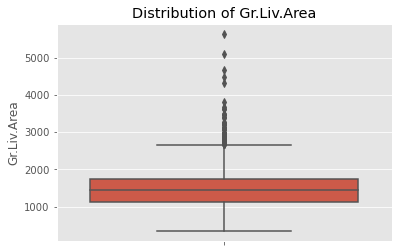

In [540]:
sns.boxplot(data = df_num, y = df_num["Gr.Liv.Area"])
plt.title("Distribution of Gr.Liv.Area")

Remove extreme outliers, which will be deemed as those with living areas over 4000 sq ft.

In [541]:
print("There are", df_num.shape[0], "rows before filtering.")
df_num = df_num[df_num["Gr.Liv.Area"] < 4000]
print("There are", df_num.shape[0], "rows after filtering.")

There are 2930 rows before filtering.
There are 2925 rows after filtering.


#### Handling Zero Values

Find rows with zero value in over 20% of rows

In [542]:
zero_cols = []

for col in df_num.columns:
    zeros = (df_num[col] == 0).sum()
    pct_zeros = zeros / df_num.shape[0]
    if pct_zeros >= 0.2:
        zero_cols.append(col)
        print(col)
        print(pct_zeros)
        print("")

Mas.Vnr.Area
0.5972649572649573

BsmtFin.SF.1
0.31794871794871793

BsmtFin.SF.2
0.8796581196581197

X2nd.Flr.SF
0.5733333333333334

Low.Qual.Fin.SF
0.9863247863247864

Bsmt.Full.Bath
0.5832478632478633

Bsmt.Half.Bath
0.9401709401709402

Half.Bath
0.6300854700854701

Fireplaces
0.48615384615384616

Wood.Deck.SF
0.5217094017094017

Open.Porch.SF
0.4444444444444444

Enclosed.Porch
0.8430769230769231

X3Ssn.Porch
0.9873504273504273

Screen.Porch
0.9124786324786325

Pool.Area
0.9962393162393163

Misc.Val
0.9651282051282051



In [543]:
print("There are", df_num.shape[1], "columns before filtering.")
df_num.drop(zero_cols, axis = 1, inplace = True)
print("There are", df_num.shape[1], "columns after filtering.")

There are 39 columns before filtering.
There are 23 columns after filtering.


#### Year.Built and Year.Remod.Add

Ensure that all rows have year build before year remodelled

In [544]:
df_num.loc[df["Year.Built"] > df["Year.Remod.Add"]]

,Order,PID,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,Gr.Liv.Area,Full.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Garage.Yr.Blt,Garage.Cars,Garage.Area,Mo.Sold,Yr.Sold,SalePrice
850,851.0,907194160.0,20.0,65.0,10739.0,7.0,5.0,2002.0,2001.0,172.0,1431.0,1444.0,1444.0,2.0,3.0,1.0,6.0,2002.0,2.0,577.0,4.0,2009.0,203000.0


In [545]:
print("There are", df_num.shape[0], "rows before filtering.")
df_num.drop(850, axis = 0, inplace = True)
print("There are", df_num.shape[0], "rows after filtering.")

There are 2925 rows before filtering.
There are 2924 rows after filtering.


#### Drop Unnecessary Columns

Based on knoledge of the dataset, eliminate rows that will not be useful for model construction and prediction.

In [546]:
df_num.columns

Index(['Order', 'PID', 'MS.SubClass', 'Lot.Frontage', 'Lot.Area',
       'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'X1st.Flr.SF', 'Gr.Liv.Area',
       'Full.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'TotRms.AbvGrd',
       'Garage.Yr.Blt', 'Garage.Cars', 'Garage.Area', 'Mo.Sold', 'Yr.Sold',
       'SalePrice'],
      dtype='object')

In [547]:
print("There are", df_num.shape[1], "columns before filtering.")

df_num.drop(["Order", "PID", "MS.SubClass", "Overall.Qual", "Overall.Cond", "Full.Bath", "Kitchen.AbvGr", "Garage.Yr.Blt"], 
            axis = 1, inplace = True)

print("There are", df_num.shape[1], "columns after filtering.")

There are 23 columns before filtering.
There are 15 columns after filtering.


#### Duplicate Rows

In [548]:
df_num.duplicated().sum()

2

In [549]:
print("There are", df_num.shape[0], "rows before filtering.")
df_num.drop_duplicates(keep = "first", inplace = True)
print("There are", df_num.shape[0], "rows after filtering.")

There are 2924 rows before filtering.
There are 2922 rows after filtering.


#### Null Values

In [550]:
df_num.isnull().sum()

Lot.Frontage      490
Lot.Area            0
Year.Built          0
Year.Remod.Add      0
Bsmt.Unf.SF         1
Total.Bsmt.SF       1
X1st.Flr.SF         0
Gr.Liv.Area         0
Bedroom.AbvGr       0
TotRms.AbvGrd       0
Garage.Cars         1
Garage.Area         1
Mo.Sold             0
Yr.Sold             0
SalePrice           0
dtype: int64

Text(0.5, 1.0, 'Distribution of Sale Price for Rows WITHOUT Null Lot.Frontage Values')

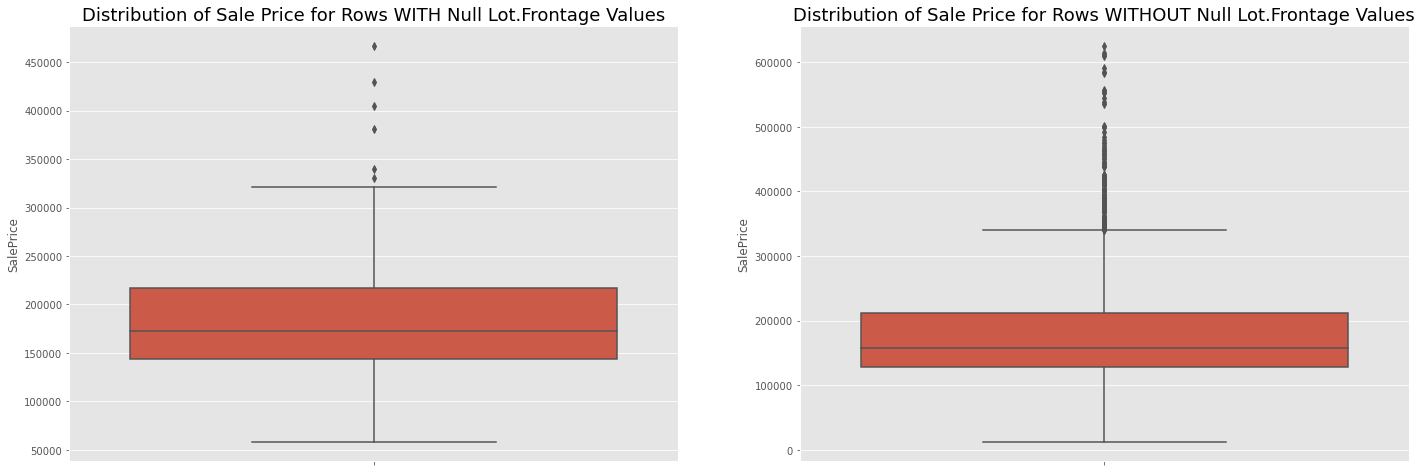

In [551]:
fig, ax = plt.subplots(1, 2, figsize = (24, 8))

sns.boxplot(data = df_num[df_num["Lot.Frontage"].isnull()], y = "SalePrice", ax = ax[0])
ax[0].set_title("Distribution of Sale Price for Rows WITH Null Lot.Frontage Values", fontsize = 18)

sns.boxplot(data = df_num.dropna(), y = "SalePrice", ax = ax[1])
ax[1].set_title("Distribution of Sale Price for Rows WITHOUT Null Lot.Frontage Values", fontsize = 18)

There do not appear to be significantly different distributions of Sale Price for the rows with and without null values in the Lot.Frontage columns, so the null values can be removed from the dataset.

In [552]:
print("There are", df_num.shape[0], "rows before filtering.")
df_num.dropna(how = "any", inplace = True)
print("There are", df_num.shape[0], "rows aftertering.")

There are 2922 rows before filtering.
There are 2430 rows aftertering.


#### Mo.Sold (month sold)

Because months are not numeric and are currently listed as 1-12, they should be replaced by the month name and converted to dummy variables.

In [553]:
month_dict = {1 : "Jan", 
              2 : "Feb", 
              3 : "Mar", 
              4 : "Apr", 
              5 : "May",
              6 : "Jun",
              7 : "Jul",
              8 : "Aug", 
              9 : "Sep",
              10 : "Oct",
              11 : "Nov", 
              12 : "Dec"}

df_num["Mo.Sold"] = df_num["Mo.Sold"].apply(lambda x: month_dict[x])

In [554]:
df_num = pd.get_dummies(df_num, columns = ["Mo.Sold"])

#### Years

Transform columns with years such that they are represented by their number of years since 2010 (last year in the dataset)

In [555]:
years = ["Year.Built", "Year.Remod.Add", "Yr.Sold"]

for col in years:
    df_num[col] = df_num[col].transform(lambda x: 2010 - x)

In [556]:
df_num[years].head()

,Year.Built,Year.Remod.Add,Yr.Sold
0,50.0,50.0,0.0
1,49.0,49.0,0.0
2,52.0,52.0,0.0
3,42.0,42.0,0.0
4,13.0,12.0,0.0


## Feature Engineering

In [557]:
X = df_num.drop("SalePrice", axis = 1).values
X[0]

array([1.410e+02, 3.177e+04, 5.000e+01, 5.000e+01, 4.410e+02, 1.080e+03,
       1.656e+03, 1.656e+03, 3.000e+00, 7.000e+00, 2.000e+00, 5.280e+02,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00])

In [558]:
Y = df_num["SalePrice"].values
Y[0:5]

array([215000., 105000., 172000., 244000., 189900.])

## K-Means Clustering

Iterate through clusters numbers to classify samples into 2-12 clusterss using the k-means clustering algorithm. Then determine the silhouette score, davies bouldin score and calinski harabasz score to determine which number of clusters maximizes the homogeneity of the clusters. In addition, an elbow plot is used to show the sum or squared errors for each number of clusters.

In [559]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [560]:
clus_sil_score = []
clus_dav_score = []
clus_cal_score = []

for i in range(11):
    
    kmeans = KMeans(n_clusters = i + 2, random_state = 25).fit(X)
    kmeans_predict = kmeans.predict(X)
    
    clus_sil_score.append(silhouette_score(X, kmeans_predict))
    clus_dav_score.append(davies_bouldin_score(X, kmeans_predict))
    clus_cal_score.append(calinski_harabasz_score(X, kmeans_predict))
    
    print(i, "Clusters:")
    print("Silhouette Score =", clus_sil_score[i])
    print("Davies Bouldin Score =", clus_dav_score[i])
    print("Calinski Harabasz Score =", clus_cal_score[i])
    print("")

0 Clusters:
Silhouette Score = 0.9764730134998465
Davies Bouldin Score = 0.01536314383978111
Calinski Harabasz Score = 1853.4995163932754

1 Clusters:
Silhouette Score = 0.525251854972005
Davies Bouldin Score = 0.5234687219972111
Calinski Harabasz Score = 2401.9438327941193

2 Clusters:
Silhouette Score = 0.4382998791446314
Davies Bouldin Score = 0.5246239383669039
Calinski Harabasz Score = 3429.517044534469

3 Clusters:
Silhouette Score = 0.4642789598567814
Davies Bouldin Score = 0.5042088004884049
Calinski Harabasz Score = 4627.898457744516

4 Clusters:
Silhouette Score = 0.431351766019064
Davies Bouldin Score = 0.5634065538558687
Calinski Harabasz Score = 5359.961659287244

5 Clusters:
Silhouette Score = 0.4138630283376737
Davies Bouldin Score = 0.5697400616984234
Calinski Harabasz Score = 5861.994819134827

6 Clusters:
Silhouette Score = 0.3936105765563746
Davies Bouldin Score = 0.6116104598742524
Calinski Harabasz Score = 6149.518754165893

7 Clusters:
Silhouette Score = 0.3744351

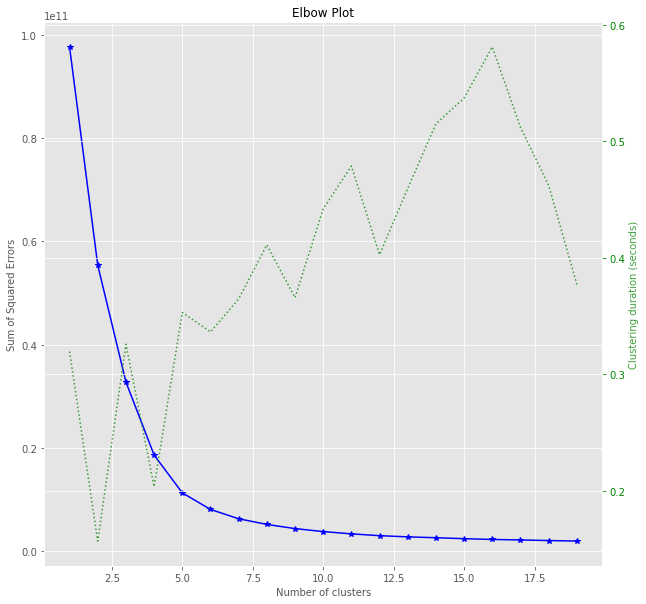

In [561]:
import scikitplot as skplt

kmeans = KMeans(random_state = 25)

skplt.cluster.plot_elbow_curve(kmeans, X, cluster_ranges = range(1, 20), n_jobs = -1, figsize = (10, 10))

plt.show()

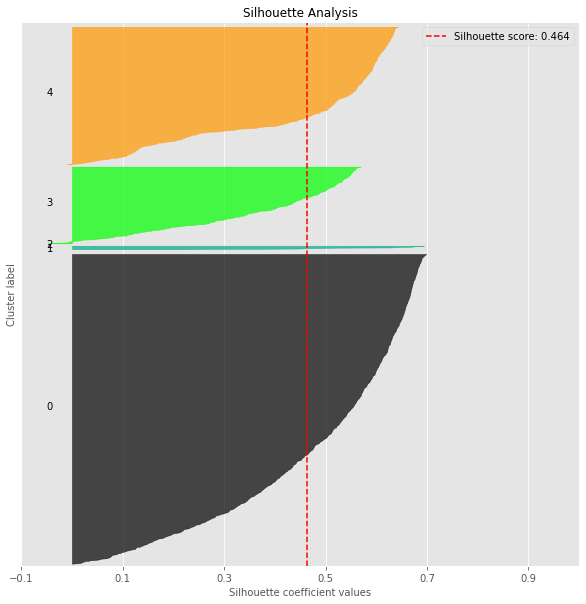

In [562]:
kmeans = KMeans(n_clusters = 5, random_state = 25).fit(X)
kmeans_predict = kmeans.predict(X)
    
skplt.metrics.plot_silhouette(X, kmeans_predict, figsize=(10,10))
plt.show()

Based on the Elbow Plot, Silhouette Score, Davies Bouldin Score, and Calinski Score, the ideal number of clusters appears to be 5 clusters. 

In [563]:
for i in range(5):
    print("Label:", np.unique(kmeans.labels_, return_counts = True)[0][i])
    print("Counts:", np.unique(kmeans.labels_, return_counts = True)[1][i])
    print("")

Label: 0
Counts: 1425

Label: 1
Counts: 1

Label: 2
Counts: 17

Label: 3
Counts: 354

Label: 4
Counts: 633



In [564]:
df_clust = df_num.copy()
df_clust["Cluster"] = kmeans.labels_

In [565]:
df_clust.groupby("Cluster")[["Year.Built", "Gr.Liv.Area", "SalePrice"]].mean().sort_values("SalePrice", ascending = False)

,Year.Built,Gr.Liv.Area,SalePrice
Cluster,,,
1,45.000000,2036.000000,375000.000000
2,41.470588,2124.235294,289234.529412
3,31.110169,1838.008475,252250.127119
0,37.905965,1494.049825,178212.315088
4,47.864139,1238.842022,139246.322275


* **Cluster 0:** mid-size, newer homes in the mid-tier price range
* **Cluster 1:** small, older homes in the low-tier price range
* **Cluster 2:** a singular unique home that is large, old, and in the high-tier price range
* **Cluster 3:** mid-size, relatively new homes in the low-tier price range
* **Cluster 4:** large, relatively old homes in the high-tier price range

## Split Data

In [566]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25)

In [567]:
from sklearn.preprocessing import StandardScaler
x_train_scale = StandardScaler().fit_transform(x_train)
x_test_scale = StandardScaler().fit_transform(x_test)

In [568]:
print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

print("")

print("Scaled Training Data Shape:", x_train_scale.shape)
print("Scaled Testing Data Shape:", x_test_scale.shape)

Training Data Shape: (1944, 25)
Testing Data Shape: (486, 25)

Scaled Training Data Shape: (1944, 25)
Scaled Testing Data Shape: (486, 25)


## Feature Reduction

Use PCA to transform train and test sets to only contain features that are responsible for 80%+ of the variance in the data.

In [569]:
from sklearn.decomposition import PCA

pca80 = PCA(n_components = 0.9, svd_solver = "full").fit(x_train)
x_train_pca = pca80.transform(x_train)
x_test_pca = pca80.transform(x_test)

print("Reduced Training Data Shape:", x_train_pca.shape)
print("Reduced Testing Data Shape:", x_test_pca.shape)

Reduced Training Data Shape: (1944, 1)
Reduced Testing Data Shape: (486, 1)


In [570]:
pca80_scale = PCA(n_components = 0.9, svd_solver = "full").fit(x_train_scale)
x_train_scale_pca = pca80.transform(x_train_scale)
x_test_scale_pca = pca80.transform(x_test_scale)

print("Reduced Scaled Training Data Shape:", x_train_scale_pca.shape)
print("Reduced Scaled Testing Data Shape:", x_test_scale_pca.shape)

Reduced Scaled Training Data Shape: (1944, 1)
Reduced Scaled Testing Data Shape: (486, 1)


There appears to be one variable that is responsible for 80%+ of the variance in the data.

## Random Forest Regression

Train random forest regression model and set hyperparameters such that there are 100 trees in the forest (n_estimators), the nodes are expanded until the leaves are pure (max_depth), the number of features considered for each split is log2 of the number of features (max_features), and out of bag samples are used when building trees (oob_score).

In [571]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#### Train model using unstandardized training data

In [572]:
RandFor1 = RandomForestRegressor(n_estimators = 100, max_depth = None, max_features = "log2", oob_score = True, 
                                 n_jobs = -1, random_state = 25).fit(x_train, y_train)

RandFor1_yhat = RandFor1.predict(x_test)
r2_test1 = r2_score(y_test, RandFor1_yhat)

print("Training R-Square = %.2f" % RandFor1.score(x_train, y_train))
print("OOB R-Square = %.2f" % RandFor1.oob_score_)
print("Testing R-Square = %.2f" % r2_test1)

Training R-Square = 0.98
OOB R-Square = 0.88
Testing R-Square = 0.85


The model performs well on the testing data despite there being apparent overfitting on the training data.

In [573]:
X_features = df_num.drop("SalePrice", axis = 1).columns.to_list()

In [574]:
df_feature_importances1 = pd.DataFrame({"feature" : X_features,
                                        "importance" : RandFor1.feature_importances_})

df_feature_importances1.sort_values("importance", ascending = False)

,feature,importance
7,Gr.Liv.Area,0.149865
5,Total.Bsmt.SF,0.135219
2,Year.Built,0.131621
11,Garage.Area,0.121390
6,X1st.Flr.SF,0.119678
10,Garage.Cars,0.082550
3,Year.Remod.Add,0.074196
9,TotRms.AbvGrd,0.043273
1,Lot.Area,0.042412
0,Lot.Frontage,0.033494


~70% of the reduction in model impurity was determined by 6 variables: Garage.Cars, Gr.Liv.Area, Total.Bsmt.SF, Year.Built, Garage.Area, and X1st.Flr.SF. 

#### Train model using standardized training data

In [575]:
RandFor2 = RandomForestRegressor(n_estimators = 100, max_depth = None, max_features = "log2", oob_score = True, 
                                 n_jobs = -1, random_state = 25).fit(x_train_scale, y_train)

RandFor2_yhat = RandFor2.predict(x_test_scale)
r2_test2 = r2_score(y_test, RandFor2_yhat)

print("Scaled Training R-Squared = %.2f" % RandFor2.score(x_train_scale, y_train))
print("OOB-Squared = %.2f" % RandFor2.oob_score_)
print("Scaled Testing R-Squared = %.2f" % r2_test2)

Scaled Training R-Squared = 0.98
OOB-Squared = 0.87
Scaled Testing R-Squared = 0.85


In [576]:
df_feature_importances2 = pd.DataFrame({"feature" : X_features,
                                      "importance" : RandFor2.feature_importances_})

df_feature_importances2.sort_values("importance", ascending = False)

,feature,importance
7,Gr.Liv.Area,0.149865
5,Total.Bsmt.SF,0.135219
2,Year.Built,0.131621
11,Garage.Area,0.121390
6,X1st.Flr.SF,0.119678
10,Garage.Cars,0.082550
3,Year.Remod.Add,0.074196
9,TotRms.AbvGrd,0.043273
1,Lot.Area,0.042412
0,Lot.Frontage,0.033494


The R-Square results and feature importances for the model with scaled feature data is nearly identical to the non-scaled data. The is because the Random Forest regression algorithm is very flexible and able to handle features with various scales. 

## AdaBoost Regression

Train ada boost regression model and set hyperparameters such that the boosted ensemble is built from a DecisionTreeRegressor with max_depth of 3 (base_estimator), there are a maximum of 100 estimators at which the boosting is terminated (n_estimators), and the learning rate is 1 (learning_rate) 

In [577]:
from sklearn.ensemble import AdaBoostRegressor

#### Train model using unstandardized training data

In [578]:
AdaBoost1 = AdaBoostRegressor(base_estimator = None, n_estimators = 100, learning_rate = 1).fit(x_train, y_train)

AdaBoost1_yhat = AdaBoost1.predict(x_test)
r2_test_boost1 = r2_score(y_test, AdaBoost1_yhat)

print("Training R-Squared = %.2f" % AdaBoost1.score(x_train, y_train))
print("Testing R-Squared = %.2f" % r2_test_boost1)

Training R-Squared = 0.87
Testing R-Squared = 0.81


The model explains a significant amount of the variation in the testing set without much overfitting on the training set. 

In [579]:
df_feature_importances_boost1 = pd.DataFrame({"feature" : X_features,
                                              "importance" : AdaBoost1.feature_importances_})

df_feature_importances_boost1.sort_values("importance", ascending = False)

,feature,importance
7,Gr.Liv.Area,0.287799
2,Year.Built,0.171417
5,Total.Bsmt.SF,0.156900
10,Garage.Cars,0.117155
6,X1st.Flr.SF,0.085690
3,Year.Remod.Add,0.041036
11,Garage.Area,0.036762
1,Lot.Area,0.033699
0,Lot.Frontage,0.027017
4,Bsmt.Unf.SF,0.017043


5 features account for ~80% of the impurity reduction

#### Train model using unstandardized PCA training data

In [580]:
AdaBoost2 = AdaBoostRegressor(base_estimator = None, n_estimators = 100, learning_rate = 1).fit(x_train_pca, y_train)

AdaBoost2_yhat = AdaBoost2.predict(x_test_pca)
r2_test_boost2 = r2_score(y_test, AdaBoost2_yhat)

print("Training R-Squared = %.2f" % AdaBoost2.score(x_train_pca, y_train))
print("Testing R-Squared = %.2f" % r2_test_boost2)

Training R-Squared = 0.19
Testing R-Squared = 0.22


Despite determining 80% of the variation in the data, the 1 variable from the PCA feature reduction is not good at predicting home sale price.

## Conclusion
The Random Forest Regression model that was trained on the unstandardized and non-reduced training data appears to be the most predictive of home Sale Price, with 85% of the variation in Sale Price being explained by the model's features. This data would be useful for real estate investors and homebuyers who are interested in residential real estate in Ames, Iowa. Investors can use this model to find undervalued and overvalued homes in order to find investment arbitrage, and homebuyers can use this model during the home buying and negotiation process to determine if the homes they are interested in are accurately priced. 